## 10장 모델 설계하기

In [ ]:
import numpy as np
import pandas as pd

### 데이터 다운 후 업로드
https://github.com/gilbutITbook/006958

numpy 로 불러오기

In [ ]:
data_numpy = np.loadtxt('ThoraricSurgery.csv',delimiter=',')

In [ ]:
data_numpy

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

pandas 로 불러오기

In [ ]:
data_pandas = pd.read_csv('ThoraricSurgery.csv',header=None) # 판다스가 좀 더 편하더라..

In [ ]:
data_pandas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


모듈 임포트 , 시드 설정

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

x,y 데이터 분리

In [ ]:
x_data = data_pandas.iloc[:,:17] # 판다스 인덱싱
y_data = data_pandas.iloc[:,17]
x_data

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62
0,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60
1,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66
2,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80
3,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56
4,18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76
465,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77
466,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62
467,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58


In [ ]:
y_data

0      0
1      1
2      1
3      0
4      0
      ..
464    0
465    0
466    0
467    1
468    0
Name: 0.10, Length: 469, dtype: int64

## 모델 구조 결정
입력층 , 은닉층 , 출력층 설정

In [ ]:
model = Sequential()
model.add(Dense(30,input_dim = 17,activation='relu')) # 30 개의 노드, 입력(x)의 차원 17,활성화함수 relu
model.add(Dense(1,activation='sigmoid')) # 출력층 , 활성화함수 sigmoid


##모델 실행
모델 컴파일

In [ ]:
from tensorflow.keras import optimizers

optim = optimizers.Adam(learning_rate=0.002)  ## 옵티마이저 설정(경사하강법 등)
model.compile(optimizer = optim,loss='binary_crossentropy',metrics=['accuracy']) #손실함수를 교차엔트로피로


## 모델 실행

epoch 와 batchsize 설명

In [ ]:
model.fit(x_data,y_data,epochs=500,batch_size=8)

모델 평가

In [ ]:
print("acc : %.2f"%(model.evaluate(x_data,y_data)[1]))

15/15 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8934
acc : 0.89


## 11장 데이터 다루기

pandas 다뤄보기


In [ ]:
df = pd.read_csv('pima-indians-diabetes.csv',
                 names=["pregnant","plasma","pressure","thickness","insulin","BMI",
                        "pedigree","age","class"]) # 이 데이터에는 헤더가 없으니 직접 넣어주자
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


전반적인 정보 확인 datafrme.info()

null 값 확인 할때도 쓰임

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe() # 통계값 보여줌

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df[['age','BMI']]

,age,BMI
0,50,33.6
1,31,26.6
2,32,23.3
3,21,28.1
4,33,43.1
...,...,...
763,63,32.9
764,27,36.8
765,30,26.2
766,47,30.1


### 데이터 가공하기

In [ ]:
# 당뇨병 질병을 예측
# 어떤 정보와 당뇨병 발병이 어떠한 관계에 있는지 살펴봐야함
new_group = df[['pregnant','class']].groupby(['pregnant'],as_index=False)
new_group = new_group.mean().sort_values(by='pregnant',ascending=True)
new_group
# 임신 횟수당 발병 확률 테이블

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


#### 더 많은 pandas 활용 방법은

이 책 추천

[Do it! 데이터 분석을 위한 판다스 입문](https://kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791163030287)

### matplotlib 를 활용하여 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

### 상관 관계도

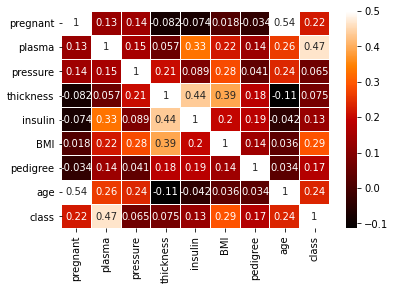

In [ ]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)
plt.show()

빠진 데이터를 채워넣거나

문자열 데이터를 숫자로 바꾸거나

전혀 관계가 없는 쓸모없는 데이터가 끼어있는걸 바꾸는 과정을

**데이터 전처리 과정** 이라 하며

 모델 성능 향상을 위해 빠져서는 안되는 중요한 과정이다

### 모델 설정,실행,평가

X 와 Y 분리

In [ ]:
x_data = df.iloc[:,:8]
y_data = df.iloc[:,8]

In [ ]:
x_data

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y_data

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

모델 설정

In [ ]:
model = Sequential()
model.add(Dense(16,input_dim = 8 ,activation='relu')) # 입력층,16 개의 노드, 입력(x)의 차원 8,활성화함수 relu
model.add(Dense(8, activation='relu')) # 은닉층 8 개의 노드, 활성화함수 relu
model.add(Dense(4, activation='relu')) # 은닉층 4 개의 노드, 활성화함수 relu
model.add(Dense(1,activation='sigmoid')) # 출력층 , 활성화함수 sigmoid

In [ ]:
optim = optimizers.Adam(learning_rate=0.005)  ## 옵티마이저 설정(경사하강법 등)
model.compile(optimizer = optim,loss='binary_crossentropy',metrics=['accuracy']) #손실함수를 교차엔트로피로

모델 학습 실행

In [ ]:
model.fit(x_data,y_data,epochs=200,batch_size=4)

모델 평가

In [ ]:
print("acc : %.2f"%(model.evaluate(x_data,y_data)[1]))

24/24 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7852
acc : 0.79


## 과정 정리

- 데이터 불러오기
  - numpy로 불러오기 ,pandas 로 불러오기
- 데이터 전처리 과정
 - null(결측치) 비어있는값 채워넣는 등 처리
 - 문자열 데이터 숫자로 바꾸는 인코딩 과정
 - 데이터 시각화를 통해 데이터를 가공하는 전 과정

- 모델 설정 과 학습
  - 모델 설정과 신경망 모델 쌓기
  - 모델 컴파일
  - 모델 학습

- 모델 평가
 - 나중에 더 자세하게..